In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import datetime as date
import matplotlib.pyplot as plt
import pyfolio
import warnings

/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
# Instalar estas librerias para poder ejecutar correctamente el portafolio de inversión.
# %pip install pandas_datareader
# %pip install pyfolio
# %pip install watermark

In [4]:
%load_ext watermark
%watermark
%watermark -p pandas_datareader,pandas,pyfolio

2020-11-12T00:23:08-06:00

CPython 3.8.3
IPython 7.16.1

compiler   : Clang 10.0.0 
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
pandas_datareader 0.9.0
pandas 1.0.5
pyfolio 0.9.2


In [5]:
def get_Data(index):
    data = pdr.get_data_yahoo(index, start=startdate, end=enddate)
    return data

In [6]:
startdate = date.datetime(2019, 1, 1)
enddate = date.datetime(2020, 1, 1)

In [7]:
grumab = get_Data('GRUMAB.MX')
megacpo = get_Data("MEGACPO.MX")    #Acciones del portafolio
cuervo= get_Data("CUERVO.MX")
ipc = get_Data('^MXX')

grumab.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,223.000000,220.149994,221.869995,221.550003,406167.0,210.278763
2019-01-03,224.300003,220.100006,221.070007,222.009995,425984.0,210.715347
2019-01-04,223.889999,221.009995,222.600006,222.990005,495016.0,211.645493
2019-01-07,225.000000,220.259995,223.449997,224.199997,541695.0,212.793915
2019-01-08,227.020004,223.009995,226.000000,224.559998,377490.0,213.135620


**Para cada acción de este portafolio, regresa una nueva columna, en la cual vas a dividir el cierre entre el cierre pero de la primera entrada.**

In [8]:
for stock in (grumab,megacpo,cuervo,ipc):
    stock['Returns'] = stock['Adj Close'] / stock['Adj Close'].iloc[0]  

In [9]:
grumab.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2019-01-02,223.000000,220.149994,221.869995,221.550003,406167.0,210.278763,1.000000
2019-01-03,224.300003,220.100006,221.070007,222.009995,425984.0,210.715347,1.002076
2019-01-04,223.889999,221.009995,222.600006,222.990005,495016.0,211.645493,1.006500
2019-01-07,225.000000,220.259995,223.449997,224.199997,541695.0,212.793915,1.011961
2019-01-08,227.020004,223.009995,226.000000,224.559998,377490.0,213.135620,1.013586


**Invertir el 20% de nuestro dinero en grumab, otro 20% en megacpo, 40% en cuervo, y por ultimo 20% en ipc.**


**Y multiplicamos los porcentajes por los retornos**

In [10]:
for stock, allocation in zip((grumab,megacpo,cuervo,ipc),[.2,.2,.4,.2]):
    stock['Allocation'] = stock['Returns'] * allocation

grumab.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation
Date,,,,,,,,
2019-01-02,223.000000,220.149994,221.869995,221.550003,406167.0,210.278763,1.000000,0.200000
2019-01-03,224.300003,220.100006,221.070007,222.009995,425984.0,210.715347,1.002076,0.200415
2019-01-04,223.889999,221.009995,222.600006,222.990005,495016.0,211.645493,1.006500,0.201300
2019-01-07,225.000000,220.259995,223.449997,224.199997,541695.0,212.793915,1.011961,0.202392
2019-01-08,227.020004,223.009995,226.000000,224.559998,377490.0,213.135620,1.013586,0.202717


**Invertimos 50,000 en este portafolio.**

**Y creamos una columna que multiplique allocation por el dinero a invertir**

In [11]:
for stock in (grumab,megacpo,cuervo,ipc):
    stock['Position'] = stock['Allocation'] * 50000

grumab.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation,Position
Date,,,,,,,,,
2019-01-02,223.000000,220.149994,221.869995,221.550003,406167.0,210.278763,1.000000,0.200000,10000.000000
2019-01-03,224.300003,220.100006,221.070007,222.009995,425984.0,210.715347,1.002076,0.200415,10020.762176
2019-01-04,223.889999,221.009995,222.600006,222.990005,495016.0,211.645493,1.006500,0.201300,10064.996090
2019-01-07,225.000000,220.259995,223.449997,224.199997,541695.0,212.793915,1.011961,0.202392,10119.610366
2019-01-08,227.020004,223.009995,226.000000,224.559998,377490.0,213.135620,1.013586,0.202717,10135.860477


**Creamos el portafolio, y concatenamos las posiciones en el axis uno que es la fecha.**

In [12]:
portafolio = pd.concat([grumab['Position'],megacpo['Position'],cuervo['Position'],ipc['Position']], axis=1)
portafolio.columns = ['GRUMAB.MX','MEGACPO.MX','CUERVO.MX','IPC']
portafolio.head()

,GRUMAB.MX,MEGACPO.MX,CUERVO.MX,IPC
Date,,,,
2019-01-02,10000.000000,10000.000000,20000.000000,10000.000000
2019-01-03,10020.762176,9992.252376,19977.528128,9946.341568
2019-01-04,10064.996090,9822.911070,20269.662464,10043.525743
2019-01-07,10119.610366,9944.660211,19940.074516,10133.201656
2019-01-08,10135.860477,9852.795144,19895.130772,10300.850758


**Creamos una serie que viene siendo la suma de todos los anteriores para poder obsrvar el portafolio total.**

In [13]:
portafolio_total = portafolio.sum(axis=1)
portafolio_total.head()

Date
2019-01-02    50000.000000
2019-01-03    49936.884248
2019-01-04    50201.095367
2019-01-07    50137.546749
2019-01-08    50184.637151
dtype: float64

**Graficamos el rendimiento del portafolio en 1 año.**

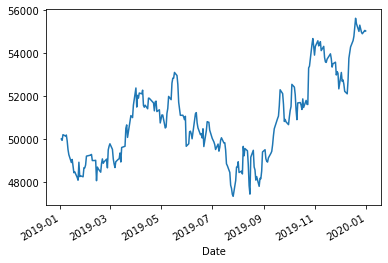

In [14]:
portafolio_total.plot()
plt.show()

**Graficamos el rendimiento de cada acción.**

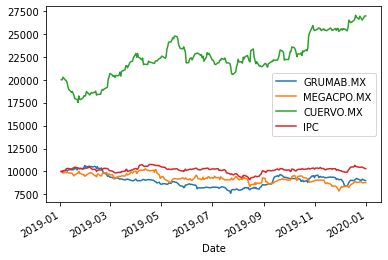

In [15]:
portafolio.plot()
plt.show()

**Calculamos los retornos diarios.**

In [16]:
portafolio_returns = portafolio_total.pct_change().dropna()
portafolio_returns.head()

Date
2019-01-03   -0.001262
2019-01-04    0.005291
2019-01-07   -0.001266
2019-01-08    0.000939
2019-01-09   -0.005284
dtype: float64

In [17]:
benchmark = ipc['Adj Close']
bench = benchmark.pct_change().dropna()
bench.rename('Benchmark IPC')
%matplotlib inline

# silence warnings

warnings.filterwarnings('ignore')

pyfolio.create_returns_tear_sheet(portafolio_returns)

Start date,2019-01-03
End date,2019-12-31
Total months,11
,Backtest
Annual return,10.2%
Cumulative returns,10.1%
Annual volatility,13.8%
Sharpe ratio,0.77
Calmar ratio,0.93
Stability,0.35
Max drawdown,-10.9%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

**Creamos los retornos logarítmicos para mayor presición.**

In [18]:
retlog=np.log(portafolio / portafolio.shift(1)).dropna()
print(retlog.head())

            GRUMAB.MX  MEGACPO.MX  CUERVO.MX       IPC
Date                                                  
2019-01-03   0.002074   -0.000775  -0.001124 -0.005380
2019-01-04   0.004405   -0.017093   0.014517  0.009723
2019-01-07   0.005411    0.012318  -0.016394  0.008889
2019-01-08   0.001605   -0.009281  -0.002256  0.016409
2019-01-09  -0.008856    0.004707  -0.012503  0.002413


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c230cbc70>,
      dtype=object)

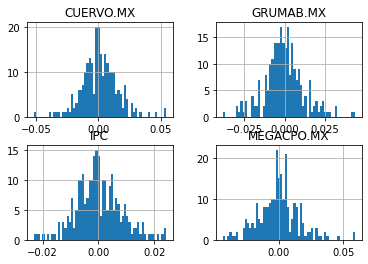

In [19]:
retlog.hist(bins=60)

In [20]:
mu=retlog.mean()
std=retlog.std()

In [21]:
def simP(dato,start,ndays,N):
    R=dato.pct_change()
    mu=R.mean()
    std=R.std()
    Rsimulada=np.random.normal(mu,std,(ndays,N))
    fecha=pd.date_range(start,periods=ndays)
    RsimDF=pd.DataFrame(index=fecha,data=Rsimulada)
    Pproyectados=dato[-1]*(RsimDF+1).cumprod()      #Proyección precios proyectados
    return Pproyectados

**Sacamos media anualizada, 252 días porque son los días que trabaja la bolsa en un año.**

In [22]:
mu = retlog.mean() * 252
print(mu)

GRUMAB.MX    -0.104868
MEGACPO.MX   -0.131522
CUERVO.MX     0.300521
IPC           0.029836
dtype: float64
